In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [391]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import scipy.interpolate as interpolate
%matplotlib inline

In [394]:
file_mar_24 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/mar/03_24.mat')
mar_24 = blt.import_var_mat_VC(file_mar_24)
file_mar_48 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/mar/03_48.mat')
mar_48 = blt. import_var_mat_VC(file_mar_48)

In [395]:
mar_24.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'HGT', 'PH', 'U', 'V', 'PHB', 'Z'])

In [396]:
mar_48.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'HGT', 'PH', 'U', 'V', 'PHB', 'Z'])

# The plot test

In [397]:
gustavo_a_madero = blt.region()
blt.read_region(gustavo_a_madero, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/gustavo_a_madero.xy")

In [398]:
milpa_alta = blt.region()
blt.read_region(milpa_alta, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/milpa_alta.xy")

In [399]:
tlahuac = blt.region()
blt.read_region(tlahuac, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/tlahuac.xy")

In [400]:
cuajimalpa = blt.region()
blt.read_region(cuajimalpa, "/Users/claudiopierard/WRF/Datos/delegaciones_cdmx/cuajimalpa.xy")

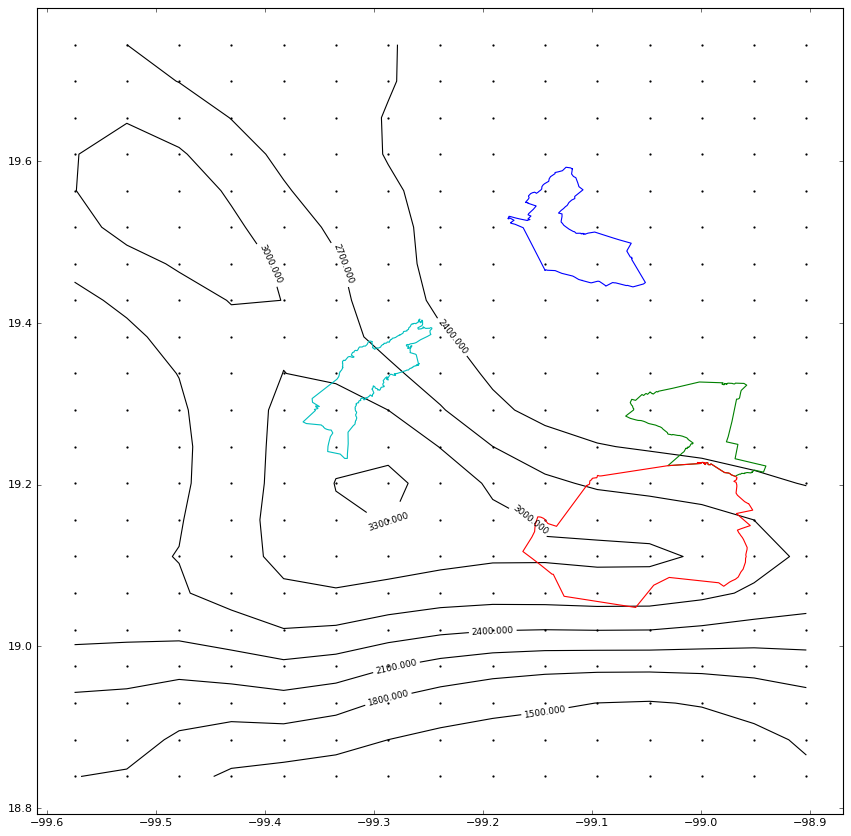

In [401]:
fig = plt.figure(figsize=(13,13))
Cs = plt.contour(mar_24['XLONG'][:,:, 0, 0], mar_24['XLAT'][:,:, 0, 0], mar_24['HGT'][:,:, 0, 0], colors= 'k')
plt.clabel(Cs, fontsize = 8) 
plt.plot(gustavo_a_madero.lon, gustavo_a_madero.lat)
plt.plot(tlahuac.lon, tlahuac.lat)
plt.plot(milpa_alta.lon, milpa_alta.lat)
plt.plot(cuajimalpa.lon, cuajimalpa.lat)
plt.scatter(mar_24['XLONG'][:,:, 0, 0], mar_24['XLAT'][:,:, 0, 0], s = 1)

In [402]:
mar_24['XLONG'].shape

(15, 21, 24, 31)

In [403]:
mar_24['V'].shape

(15, 20, 49, 24, 31)

In [404]:
mar_24['HGT'].shape

(15, 21, 24, 31)

In [405]:
def chop_extradim(dir_month):
    for i in dir_month:
        print(i)
        print(dir_month[i].shape)
        if len(dir_month[i].shape) == 5:
            dir_month[i] = dir_month[i][:,:20,:,:,:]
        elif len(dir_month[i].shape) == 4:
            dir_month[i] = dir_month[i][:,:20,:,:]
        print(dir_month[i].shape)
        print('-----')

In [406]:
chop_extradim(mar_48)

XLONG
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
PBLH
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
XLAT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
HGT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
PH
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----
U
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
V
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
PHB
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----
Z
(15, 21, 49, 24, 31)
(15, 20, 49, 24, 31)
-----


In [407]:
for i in mar_24:
    print(i)
    print(mar_24[i].shape)
    if len(mar_24[i].shape) == 5:
        mar_24[i] = mar_24[i][:,:20,:,:,:]
    elif len(mar_24[i].shape) == 4:
        mar_24[i] = mar_24[i][:,:20,:,:]
    print(mar_24[i].shape)
    print('-----')

XLONG
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
PBLH
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
XLAT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
HGT
(15, 21, 24, 31)
(15, 20, 24, 31)
-----
PH
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----
U
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
V
(15, 20, 49, 24, 31)
(15, 20, 49, 24, 31)
-----
PHB
(15, 21, 50, 24, 31)
(15, 20, 50, 24, 31)
-----
Z
(15, 21, 49, 24, 31)
(15, 20, 49, 24, 31)
-----


# Fusionando 24 y 48, para sacar las 30 horas del ciclo local

In [408]:
mar_24['U'].shape

(15, 20, 49, 24, 31)

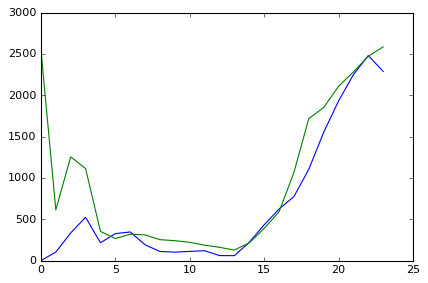

In [409]:
plt.plot(mar_24['PBLH'][10, 12, :, 1])
plt.plot(mar_48['PBLH'][10, 12, :, 1])

In [410]:
B = np.zeros((15, 20, 24, 31))
B[:,:, :18, :] = mar_24['PBLH'][:, :, 6:24, :]
B[:,:, 18:24, :] = mar_48['PBLH'][:, :, 0:6, :]

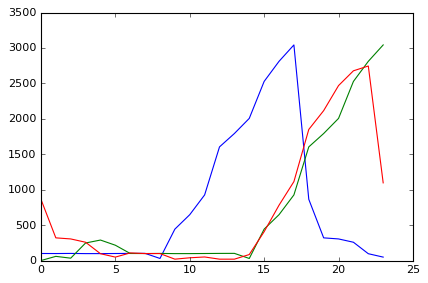

In [411]:
day = 3
nx = 13
ny = 15
plt.plot(B[nx, ny, :, day])
plt.plot(mar_24['PBLH'][nx, ny, :, day])
plt.plot(mar_48['PBLH'][nx, ny, :, day])

In [412]:
def concatenate_24_48(dir_month_24, dir_month_48):
    D ={}
    for i in dir_month_24:
        print(i)
        if len(dir_month_24[i].shape) == 5:
            B = np.zeros_like(dir_month_24[i])
            B[:, :, :, :18, :] = dir_month_24[i][:, :, :, 6:24, :]
            B[:, :, :, 18:24, :] = dir_month_48[i][:, :, :, 0:6, :]
            
            
        elif len(dir_month_24[i].shape) == 4:
            B = np.zeros_like(dir_month_24[i])
            B[:,:, :18, :] = dir_month_24[i][:, :, 6:24, :]
            B[:,:, 18:24, :] = dir_month_48[i][:, :, 0:6, :]
            
        D[i] = B
            
        print('-----')
    return D

In [413]:
C = concatenate_24_48(mar_24, mar_48)

XLONG
-----
PBLH
-----
XLAT
-----
HGT
-----
PH
-----
U
-----
V
-----
PHB
-----
Z
-----


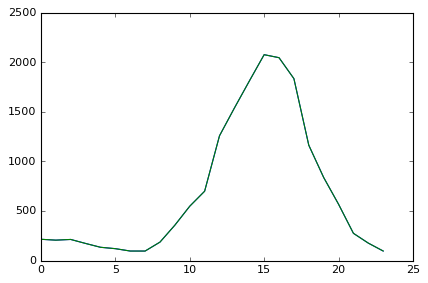

In [414]:
day = 7
nx = 13
ny = 15
plt.plot(B[nx, ny, :, day])
plt.plot(C['PBLH'][nx, ny, :, day])

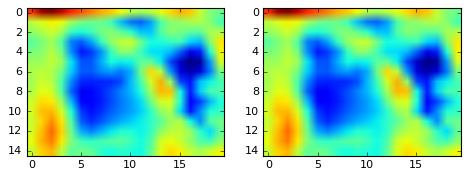

In [415]:
day = 7
hour = 20
level = 20
fig = plt.figure(figsize=(7,8))
ax1 = plt.subplot(121)
ax1.imshow(C['V'][:,:, level, hour, day])
if hour < 18:
    ax2 = plt.subplot(122)
    ax2.imshow(mar_24['V'][:,:, level, hour+6, day])
elif hour >= 18:
    ax2 = plt.subplot(122)
    ax2.imshow(mar_48['V'][:,:, level, hour-18, day])

In [441]:
mar_UTCm6 = concatenate_24_48(mar_24, mar_48)

XLONG
-----
PBLH
-----
XLAT
-----
HGT
-----
PH
-----
U
-----
V
-----
PHB
-----
Z
-----


-------
# Interpolar a una malla más fina

In [417]:
nx, ny = (30, 40)

In [418]:
x = np.linspace(mar_UTCm6['XLONG'][:,0, 0,0].min(), mar_UTCm6['XLONG'][:,0, 0,0].max(), nx)

In [419]:
y = np.linspace(mar_UTCm6['XLAT'][:,0, 0,0].min(), mar_UTCm6['XLAT'][0,:, 0,0].max(), ny)

In [457]:
xx, yy = np.meshgrid(x,y)

In [465]:
xx.T

array([[-99.52663422, -99.52663422, -99.52663422, ..., -99.52663422,
        -99.52663422, -99.52663422],
       [-99.50348269, -99.50348269, -99.50348269, ..., -99.50348269,
        -99.50348269, -99.50348269],
       [-99.48033116, -99.48033116, -99.48033116, ..., -99.48033116,
        -99.48033116, -99.48033116],
       ..., 
       [-98.90154293, -98.90154293, -98.90154293, ..., -98.90154293,
        -98.90154293, -98.90154293],
       [-98.8783914 , -98.8783914 , -98.8783914 , ..., -98.8783914 ,
        -98.8783914 , -98.8783914 ],
       [-98.85523987, -98.85523987, -98.85523987, ..., -98.85523987,
        -98.85523987, -98.85523987]])

**CUIDADO!** se tiene que trasponer el campo a interpolar 

In [420]:
xxx = mar_UTCm6['XLONG'][:,0, 0,0]
yyy = mar_UTCm6['XLAT'][0,:, 0,0]
f = interpolate.interp2d(xxx,yyy, mar_UTCm6['U'][:,:,0,0,0].T, kind='linear')
g = interpolate.interp2d(xxx,yyy, mar_UTCm6['U'][:,:,0,0,0].T, kind='cubic')

In [421]:
mar_UTCm6['XLONG'][0,:, 0,0]

array([-99.52663422, -99.52663422, -99.52663422, -99.52663422,
       -99.52663422, -99.52663422, -99.52663422, -99.52663422,
       -99.52663422, -99.52663422, -99.52663422, -99.52663422,
       -99.52663422, -99.52663422, -99.52663422, -99.52663422,
       -99.52663422, -99.52663422, -99.52663422, -99.52663422])

In [422]:
U_new_linear = f(x, y)
U_new_cubic = f(x, y)

In [423]:
x.shape

(30,)

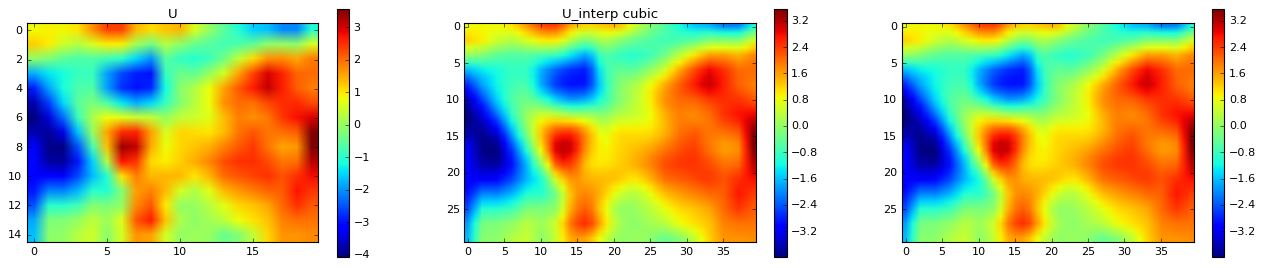

In [424]:
fig = plt.figure(figsize=(20,4))
ax1 = plt.subplot(131)
plt.imshow(mar_UTCm6['U'][:,:,0,0,0])
plt.colorbar()
ax1.set_title('U')
ax2 = plt.subplot(132)
plt.imshow(U_new_linear.T)
plt.colorbar()
ax2.set_title('U_interp linear')
ax3 = plt.subplot(133)
plt.imshow(U_new_cubic.T)
plt.colorbar()
ax2.set_title('U_interp cubic')

In [425]:
interpolate.interp2d

scipy.interpolate.interpolate.interp2d

In [426]:
U_new.T.shape

(30, 40)

In [427]:
mar_UTCm6['U'][:,:,0,0,0].shape

(15, 20)

In [428]:
def interpolate_field(x, y, XLONG_field, XLAT_field, field, Kind = 'linear'):

    '''
    Hola. Aquí debe haber una descripción de la función, pero no la hay... Lo siento mucho.

    '''
    #L = []
    nx = len(x)
    ny = len(y)
    x_old = XLONG_field[:, 0, 0, 0]
    y_old = XLAT_field[0, :, 0, 0]
    
    if len(field.shape) == 5:
        field_shape = (nx, ny, field.shape[2], field.shape[3], field.shape[4])
        field_out = np.zeros(field_shape, dtype='float32')

        for d in range(0, field.shape[4]):
            for t in range(0, field.shape[3]):
                for h in range(0, field.shape[2]):

                    f = interpolate.interp2d(x_old, y_old, field[:, :, h, t, d].T, kind = Kind)
                    field_out[:, :, h, t, d] = f(x, y).T
                    #L.append(f(x,y))
        
    elif len(field.shape) == 4:
        field_shape = (nx, ny, field.shape[2], field.shape[3])
        field_out = np.zeros(field_shape, dtype='float32')

        for d in range(0, field.shape[3]):
            for t in range(0, field.shape[2]):

                f = interpolate.interp2d(x_old, y_old, field[:, :, t, d].T, kind = Kind)
                field_out[:, :, t, d] = f(x, y).T
                #L.append(f(x,y))
                    
    return field_out

In [429]:
U = mar_UTCm6['U']

In [430]:
U_interp = interpolate_field(x, y, mar_UTCm6['XLONG'], mar_UTCm6['XLAT'], mar_UTCm6['U'])

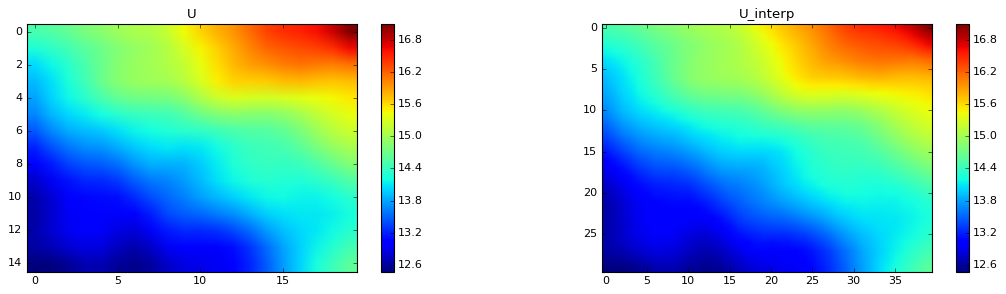

In [431]:
dia = 3
hora = 5
nivel = 40
fig = plt.figure(figsize=(17,4))
ax1 = plt.subplot(121)
plt.imshow(U[:,:, nivel, hora, dia])
plt.colorbar()
ax1.set_title('U')
ax2 = plt.subplot(122)
plt.imshow(U_interp[:,:, nivel, hora, dia])
plt.colorbar()
ax2.set_title('U_interp')

In [432]:
U.shape

(15, 20, 49, 24, 31)

In [433]:
U_interp.shape

(30, 40, 49, 24, 31)

In [434]:
PBLH = mar_UTCm6['PBLH']
PBLH_inter = interpolate_field(x, y, mar_UTCm6['XLONG'], mar_UTCm6['XLAT'], mar_UTCm6['PBLH'])

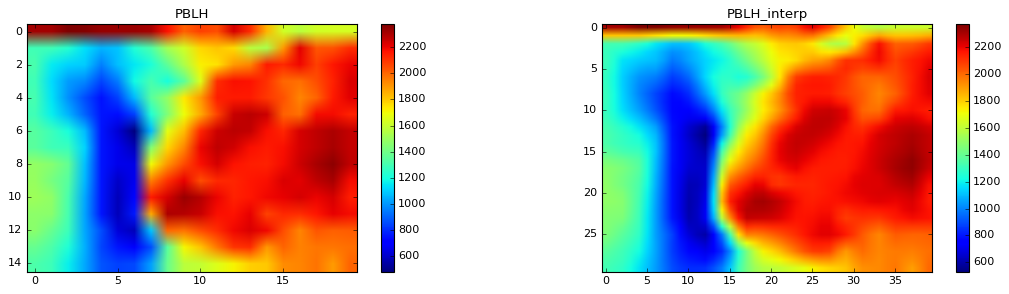

In [435]:
dia = 3
hora = 14
fig = plt.figure(figsize=(17,4))
ax1 = plt.subplot(121)
plt.imshow(PBLH[:,:, hora, dia])
plt.colorbar()
ax1.set_title('PBLH')
ax2 = plt.subplot(122)
plt.imshow(PBLH_inter[:,:, hora, dia])
plt.colorbar()
ax2.set_title('PBLH_interp')

Escirbo una función para todos los campos:

In [468]:
def interpolate_all_fields(x, y, dic_month):
    new_d = {}
    xlong_new, xlat_new = np.meshgrid(x,y)
    for i in dic_month:
        if i == 'XLAT':
            new_d[i] = xlat_new.T
        elif i == 'XLONG':
            new_d[i] = xlong_new.T
        else:
            new_d[i] = interpolate_field(x, y, dic_month['XLONG'], dic_month['XLAT'], dic_month[i])
    return new_d

In [469]:
DD = interpolate_all_fields(x, y, mar_UTCm6)

In [470]:
DD.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'HGT', 'PH', 'U', 'V', 'PHB', 'Z'])

In [474]:
mar_UTCm6['XLONG'].shape

(15, 20, 24, 31)

In [473]:
DD['XLONG'].shape

(30, 40)

-------

# Cálculo de coeficientes de ventilación

$$I_U = \int_{0}^{H} U(z) dz$$
$$I_V = \int_{0}^{H} V(z) dz$$
$$I_{UV} = \int_{0}^{H} UV(z) dz = \int_{0}^{H} \sqrt{U^2 + V^2} dz$$
Con $H = PBLH(x,y)$.

In [475]:
mar_UTCm6 = interpolate_all_fields(x, y, mar_UTCm6)

In [476]:
shh = mar_UTCm6['U'].shape

In [477]:
shh

(30, 40, 49, 24, 31)

In [478]:
shh[0]

30

In [479]:
def find_pblh_index(pblh, hgt, z):
    index = 0
    for i in range(0, len(z)):
        if z[i] > pblh+hgt:
            index = i
            break
    return index

In [480]:
t = 22
jj = []
zz = []
for j in range(0,24):
    iii = find_pblh_index(mar_UTCm6['PBLH'][10,10, j,4], mar_UTCm6['HGT'][10,10, j,4], mar_UTCm6['Z'][10,10, :,j,4])
    jj.append(iii)
    zz.append(mar_UTCm6['Z'][10,10, iii,j,4])

In [481]:
jj

[6,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 9,
 9,
 16,
 19,
 19,
 20,
 20,
 18,
 20,
 17,
 12,
 9,
 3,
 12,
 4,
 11]

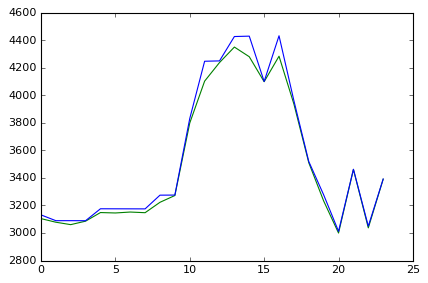

In [482]:
plt.plot(mar_UTCm6['PBLH'][10,10, :,4] + mar_UTCm6['HGT'][10,10, :,4], c = 'g')
#plt.plot(mar_UTCm6['Z'][10,10, ,j,4])
plt.plot(zz)

In [483]:
treses = np.array(range(0,5))
doseses = np.zeros(5) + 2

In [484]:
treses**2

array([ 0,  1,  4,  9, 16])

In [485]:
np.sqrt(treses**2 + doseses)

array([ 1.41421356,  1.73205081,  2.44948974,  3.31662479,  4.24264069])

In [486]:
cc = np.linspace(0, 5)

In [487]:
cc[:2+1]

array([ 0.        ,  0.10204082,  0.20408163])

In [488]:
mar_UTCm6['Z'].shape

(30, 40, 49, 24, 31)

In [489]:
def I_vent(dir_month):
    
    U = dir_month['U']
    V = dir_month['V']
    PBLH = dir_month['PBLH']
    HGT = dir_month['HGT']
    Z = dir_month['Z']
    
    u_shape = (U.shape[0], U.shape[1], U.shape[3], U.shape[4])
    I_vent_U = np.zeros(u_shape, dtype='float32')
    I_vent_V = np.zeros(u_shape, dtype='float32')
    I_vent_UV = np.zeros(u_shape, dtype='float32')

    for d in range(0, U.shape[4]):
        for t in range(0, U.shape[3]):
            for y in range(0, U.shape[1]):
                for x in range(0, U.shape[0]):
                    ii = find_pblh_index(PBLH[x,y,t,d], HGT[x,y,t,d], Z[x,y,:,t, d])
                    I_vent_U[x,y, t, d] = sum(U[x,y, :ii, t, d])/Z[x,y, ii, t, d]
                    I_vent_V[x,y, t, d] = sum(V[x,y, :ii, t, d])/Z[x,y, ii, t, d]
                    I_vent_UV[x,y, t, d] = sum(np.sqrt(U[x,y, :ii, t, d]**2 + V[x,y, :ii, t, d]**2))/Z[x,y, ii, t, d]
                    
                    
    dir_month['I_vent_U'] = I_vent_U
    dir_month['I_vent_V'] = I_vent_V
    dir_month['I_vent_UV'] = I_vent_UV

In [490]:
I_vent(mar_UTCm6)

In [491]:
mar_UTCm6.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'I_vent_UV', 'V', 'Z', 'I_vent_V', 'HGT', 'PH', 'I_vent_U', 'U', 'PHB'])

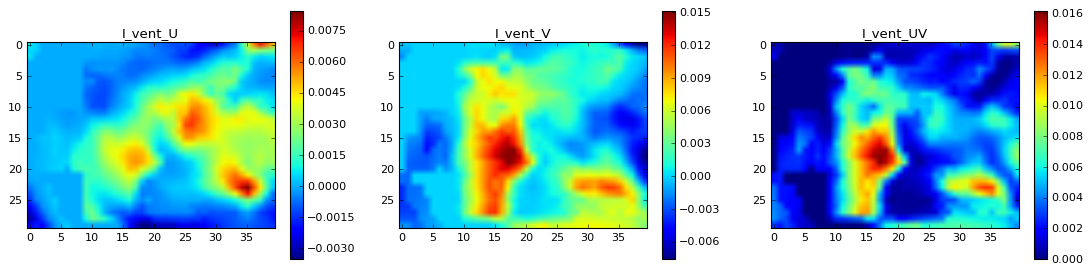

In [492]:
hour = 23
day = 7
fig = plt.figure(figsize=(17,4))
ax1 = plt.subplot(131)
plt.imshow(mar_UTCm6['I_vent_U'][:,:, hour, day])
plt.colorbar()
ax1.set_title('I_vent_U')
ax2 = plt.subplot(132)
plt.imshow(mar_UTCm6['I_vent_V'][:,:, hour, day])
plt.colorbar()
ax2.set_title('I_vent_V')
ax3 = plt.subplot(133)
plt.imshow(mar_UTCm6['I_vent_UV'][:,:, hour, day])
plt.colorbar()
ax3.set_title('I_vent_UV')

# Último índice: $U \cdot \nabla b$

In [493]:
b = mar_UTCm6['HGT'][:,:,10, 19]

In [494]:
grad_b = np.gradient(b)

In [495]:
np.dot([mar_UTCm6['U'][2,2,0, 4, 10], mar_UTCm6['V'][2,2,0, 4, 10]], [grad_b[0][2,2], grad_b[1][2,2]])

-6.5097198

In [496]:
U_vect = [mar_UTCm6['U'][:,:,0,10, 19], mar_UTCm6['V'][:,:,0,10, 19]]

In [498]:
def VCS(dir_month):
    
    U = dir_month['U']
    V = dir_month['V']
    b = dir_month['HGT'][:,:, 0, 0]
    grad_b = np.gradient(b)
    
    u_shape = (U.shape[0], U.shape[1], U.shape[3], U.shape[4])
    I_VCS = np.zeros(u_shape, dtype='float32')

    for d in range(0, U.shape[4]):
        for t in range(0, U.shape[3]):
            for y in range(0, U.shape[1]):
                for x in range(0, U.shape[0]):
                    
                    grad_b_vect = [grad_b[0][x,y], grad_b[1][x,y]]
                    
                    U_vect = [U[x,y,0,t,d], V[x,y,0,t,d]]
                    #print(U_vect)
                    I_VCS[x,y, t, d] = np.dot(U_vect, grad_b_vect)/5000
                    
                    
    dir_month['I_VCS'] = I_VCS

In [499]:
VCS(mar_UTCm6)

In [500]:
mar_UTCm6.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'I_VCS', 'I_vent_UV', 'V', 'Z', 'I_vent_V', 'HGT', 'PH', 'I_vent_U', 'U', 'PHB'])

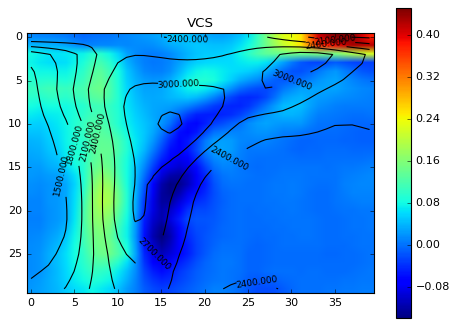

In [502]:
fig = plt.figure(figsize=(7,5))
Cs = plt.contour( mar_UTCm6['HGT'][:,:, 0, 0], colors= 'k')
plt.clabel(Cs, fontsize = 8) 
plt.imshow(mar_UTCm6['I_VCS'][:,:, 15, 20])
plt.colorbar()
plt.title('VCS')

In [504]:
np.diff(mar_UTCm6['XLAT'][0,:])*110

array([ 2.42599243,  2.42599243,  2.42599243,  2.42599243,  2.42599243,
        2.42599243,  2.42599243,  2.42599243,  2.42599243,  2.42599243,
        2.42599243,  2.42599243,  2.42599243,  2.42599243,  2.42599243,
        2.42599243,  2.42599243,  2.42599243,  2.42599243,  2.42599243,
        2.42599243,  2.42599243,  2.42599243,  2.42599243,  2.42599243,
        2.42599243,  2.42599243,  2.42599243,  2.42599243,  2.42599243,
        2.42599243,  2.42599243,  2.42599243,  2.42599243,  2.42599243,
        2.42599243,  2.42599243,  2.42599243,  2.42599243])

# Save directory to .mat

In [505]:
sio.savemat('/Users/claudiopierard/WRF/Datos/WRF/VC/mar/mar_VC.mat', mar_UTCm6)

# Lo mismo pero para SEPTIEMBRE

In [506]:
file_sep_24 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/sep/09_hrs_24.mat')
sep_24 = blt.import_var_mat_VC(file_sep_24)
file_sep_48 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/VC/sep/09_hrs_48.mat')
sep_48 = blt.import_var_mat_VC(file_sep_48)

In [507]:
chop_extradim(sep_24)
chop_extradim(sep_48)

XLONG
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
PBLH
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
XLAT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
HGT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
PH
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----
U
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
V
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
PHB
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----
Z
(15, 21, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
XLONG
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
PBLH
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
XLAT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
HGT
(15, 21, 24, 29)
(15, 20, 24, 29)
-----
PH
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----
U
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
V
(15, 20, 49, 24, 29)
(15, 20, 49, 24, 29)
-----
PHB
(15, 21, 50, 24, 29)
(15, 20, 50, 24, 29)
-----
Z
(15, 21, 49, 24, 29)
(15, 20, 49, 24, 29)
-----


In [509]:
sep_UTCm6 = concatenate_24_48(sep_24, sep_48)

XLONG
-----
PBLH
-----
XLAT
-----
HGT
-----
PH
-----
U
-----
V
-----
PHB
-----
Z
-----


In [510]:
sep_UTCm6.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'HGT', 'PH', 'U', 'V', 'PHB', 'Z'])

In [511]:
mar_UTCm6.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'I_VCS', 'I_vent_UV', 'V', 'Z', 'I_vent_V', 'HGT', 'PH', 'I_vent_U', 'U', 'PHB'])

In [512]:
sep_UTCm6 = interpolate_all_fields(x, y, sep_UTCm6)

In [513]:
I_vent(sep_UTCm6)

In [514]:
VCS(sep_UTCm6)

In [515]:
sep_UTCm6.keys()

dict_keys(['XLONG', 'PBLH', 'XLAT', 'I_VCS', 'I_vent_UV', 'V', 'Z', 'I_vent_V', 'HGT', 'PH', 'I_vent_U', 'U', 'PHB'])

In [516]:
sio.savemat('/Users/claudiopierard/WRF/Datos/WRF/VC/sep/sep_VC.mat', sep_UTCm6)